In [2]:
#importing necessary libraries

In [307]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [308]:
#import netflix stock price dataset
df=pd.read_csv("C:/Users/Rohit Jana/Downloads/archive (10).zip")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [309]:
# Here we will be interested in univeriate time series analysis to forecast open price 
# of netflix 

In [310]:
# make a new data frame
netflix=df[["Date","Open"]]
netflix.head()

,Date,Open
0,2018-02-05,262.000000
1,2018-02-06,247.699997
2,2018-02-07,266.579987
3,2018-02-08,267.079987
4,2018-02-09,253.850006


In [311]:
#summary of netflix data
netflix.describe()

,Open
count,1009.000000
mean,419.059673
std,108.537532
min,233.919998
25%,331.489990
50%,377.769989
75%,509.130005
max,692.349976


In [312]:
netflix.shape

(1009, 2)

In [313]:
#check missing values
netflix.isna().sum() # no missing value is there

Date    0
Open    0
dtype: int64

In [314]:
netflix.index=netflix['Date']
netflix.head()


,Date,Open
Date,,
2018-02-05,2018-02-05,262.000000
2018-02-06,2018-02-06,247.699997
2018-02-07,2018-02-07,266.579987
2018-02-08,2018-02-08,267.079987
2018-02-09,2018-02-09,253.850006


In [315]:
nf=netflix.drop(['Date'],axis=1)
nf.head()

,Open
Date,
2018-02-05,262.000000
2018-02-06,247.699997
2018-02-07,266.579987
2018-02-08,267.079987
2018-02-09,253.850006


<AxesSubplot:xlabel='Date'>

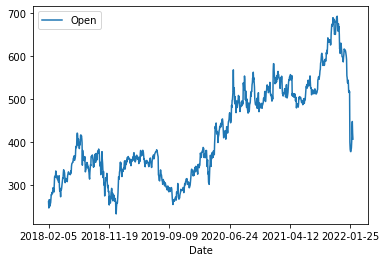

In [316]:
# plot netflix data
nf.plot() 

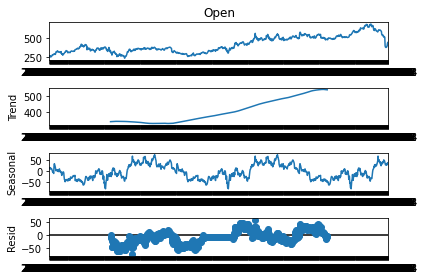

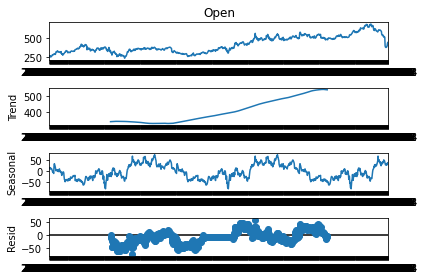

In [263]:
from statsmodels.tsa.seasonal import seasonal_decompose
result1=seasonal_decompose(nf['Open'],model='additive',freq=365)
result1.plot()

In [264]:
# as seasionality is not constant.

In [ ]:
# Fit baseline models

In [317]:
#test train split
train=nf[:-200]
test=nf[-200:]

In [318]:
train.head()

,Open
Date,
2018-02-05,262.000000
2018-02-06,247.699997
2018-02-07,266.579987
2018-02-08,267.079987
2018-02-09,253.850006


In [319]:
train.shape

(809, 1)

In [320]:
test.shape

(200, 1)

In [321]:
#predict Historical mean for last 200 days
historical_mean=np.mean(train['Open'])
historical_mean

384.5569716946848

In [322]:
test.loc[:,'pred_mean']=historical_mean
test

,Open,pred_mean
Date,,
2021-04-23,509.010010,384.556972
2021-04-26,506.760010,384.556972
2021-04-27,512.619995,384.556972
2021-04-28,505.200012,384.556972
2021-04-29,507.600006,384.556972
...,...,...
2022-01-31,401.970001,384.556972
2022-02-01,432.959991,384.556972
2022-02-02,448.250000,384.556972


In [323]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [324]:
mape_hist_mean=mape(test['Open'],test['pred_mean'])
mape_hist_mean
#This means that our baseline deviates
#by 30.02% on average from the observed daily  nextflix open price

30.02086640106253

In [325]:
#predict last 200 days mean
last_thdays_mean=np.mean(train['Open'][-200:])
last_thdays_mean

514.545699445

In [275]:
test.loc[:,"pred_last_thdays_mean"]=last_thdays_mean
test

,Open,pred_mean,pred_last_thdays_mean
Date,,,
2021-04-23,509.010010,384.556972,514.545699
2021-04-26,506.760010,384.556972,514.545699
2021-04-27,512.619995,384.556972,514.545699
2021-04-28,505.200012,384.556972,514.545699
2021-04-29,507.600006,384.556972,514.545699
...,...,...,...
2022-01-31,401.970001,384.556972,514.545699
2022-02-01,432.959991,384.556972,514.545699
2022-02-02,448.250000,384.556972,514.545699


In [276]:
#mape of last thdays mean
mape_last_thdays_mean=mape(test['Open'],test['pred_last_thdays_mean'])
mape_last_thdays_mean

10.895982016419573

In [277]:
#predict last know value
last=train['Open'].iloc[-1]
last

513.820007

In [278]:
test.loc[:,'pred_last']=last
test

,Open,pred_mean,pred_last_thdays_mean,pred_last
Date,,,,
2021-04-23,509.010010,384.556972,514.545699,513.820007
2021-04-26,506.760010,384.556972,514.545699,513.820007
2021-04-27,512.619995,384.556972,514.545699,513.820007
2021-04-28,505.200012,384.556972,514.545699,513.820007
2021-04-29,507.600006,384.556972,514.545699,513.820007
...,...,...,...,...
2022-01-31,401.970001,384.556972,514.545699,513.820007
2022-02-01,432.959991,384.556972,514.545699,513.820007
2022-02-02,448.250000,384.556972,514.545699,513.820007


In [279]:
mape_last=mape(test['Open'],test['pred_last'])
mape_last

10.936405131429726

In [280]:
# Naive seasonal forecast
test.loc[:,'pred_last_seasonal']=train['Open'][-200:].values
test

,Open,pred_mean,pred_last_thdays_mean,pred_last,pred_last_seasonal
Date,,,,,
2021-04-23,509.010010,384.556972,514.545699,513.820007,498.579987
2021-04-26,506.760010,384.556972,514.545699,513.820007,508.399994
2021-04-27,512.619995,384.556972,514.545699,513.820007,519.729980
2021-04-28,505.200012,384.556972,514.545699,513.820007,567.979980
2021-04-29,507.600006,384.556972,514.545699,513.820007,517.080017
...,...,...,...,...,...
2022-01-31,401.970001,384.556972,514.545699,513.820007,550.539978
2022-02-01,432.959991,384.556972,514.545699,513.820007,546.900024
2022-02-02,448.250000,384.556972,514.545699,513.820007,554.419983


In [281]:
mape_naive_seasonal=mape(test['Open'],test['pred_last_seasonal'])
mape_naive_seasonal

11.791237148023804

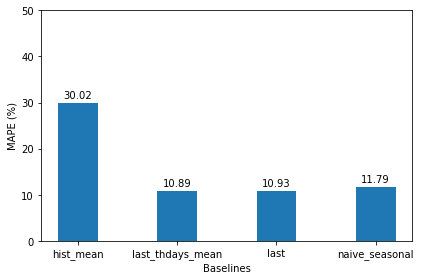

In [282]:
#plot of all mape 
fig, ax = plt.subplots()

x = ['hist_mean', 'last_thdays_mean', 'last', 'naive_seasonal']
y = [30.02, 10.89, 10.93, 11.79]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Baselines')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 50)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 1, s=str(value), ha='center')

plt.tight_layout()
#The lower the MAPE, the better the baseline; therefore, we’ll choose last 200 days mean baseline as our 
#benchmark and compare it to our more complex models

In [283]:
#From the plot of open clearly we see that there is a trend so this is not 
#stationary but we will just check using adf test again

In [284]:
from statsmodels.tsa.stattools import adfuller
ADF_result = adfuller(nf['Open']) 
print(f'ADF Statistic: {ADF_result[0]}') 
print(f'p-value: {ADF_result[1]}') # as p value>0.05 so it not stationary

ADF Statistic: -1.727556507172675
p-value: 0.41697336717910083


In [285]:
open_diff=np.diff(nf['Open'],n=1) # take first differance

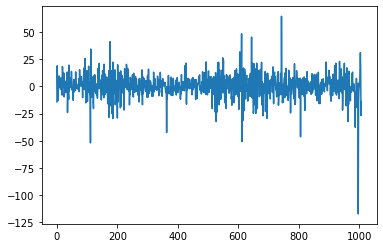

In [286]:
import matplotlib.pyplot as plt
plt.plot(open_diff)
plt.show() # so now graph is looks like stationary

In [287]:
# check stationarity using ADF test
from statsmodels.tsa.stattools import adfuller
ADF_result = adfuller(open_diff) 
print(f'ADF Statistic: {ADF_result[0]}') 
print(f'p-value: {ADF_result[1]}') # as p value<0.05 so it stationary

ADF Statistic: -10.574279444480368
p-value: 7.172266045215779e-19


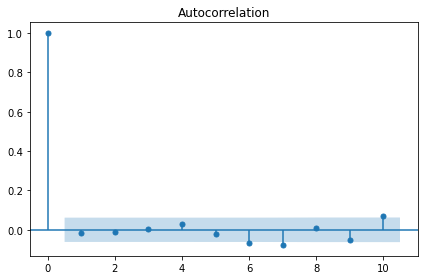

In [288]:
# we will do acf plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(open_diff, lags=10); 
plt.tight_layout()

In [289]:
#We can see that there are no significant coefficients in the ACF plot. 
#You might notice that at lags 7 and 10 the coefficients are significant, while the 
#others are not. This happens by chance with some data, and these points can be 
#assumed to be non-significant.

# so our first difference is stationary and there is no significant correlation
# in acf plot so open price of netflix is a random process.


In [290]:
# Forecast of arandom walk process
# Forecasting on a long horizon
np.random.seed(42)

steps = np.random.standard_normal(1009)
steps[0]=0

random_walk = np.cumsum(steps)

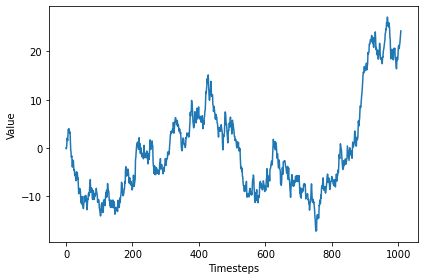

In [291]:
fig, ax = plt.subplots()

ax.plot(random_walk)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()

In [292]:
nf=pd.DataFrame({'value': random_walk})
train=nf[:-200]
test=nf[-200:]

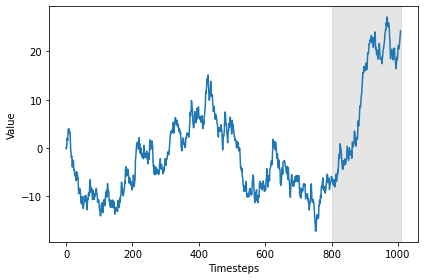

In [293]:
fig, ax = plt.subplots()

ax.plot(random_walk)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')
ax.axvspan(800, 1009, color='#808080', alpha=0.2)

plt.tight_layout()

In [294]:
#we can only use naive forecasting methods for this situation, since we are dealing with a random walk. In this case, we will use the historical mean, the last
#known value, and the drift method.


mean = np.mean(train.value) #calculate the mean of the train set

test.loc[:, 'pred_mean'] = mean # predict the historical mean for next 200 timesteps

test.head() # show the first five rows of the test

,value,pred_mean
809,-7.397997,-3.712396
810,-7.584869,-3.712396
811,-8.024600,-3.712396
812,-6.577622,-3.712396
813,-6.381067,-3.712396


In [295]:
last_value = train.iloc[-1].value #retrieve the last value of the train set

test.loc[:, 'pred_last'] = last_value # assign the last value as a prediction for the next 200 timesteps under the pred_last column

test.head()

,value,pred_mean,pred_last
809,-7.397997,-3.712396,-6.50339
810,-7.584869,-3.712396,-6.50339
811,-8.024600,-3.712396,-6.50339
812,-6.577622,-3.712396,-6.50339
813,-6.381067,-3.712396,-6.50339


In [296]:
deltaX = 809 - 1 # calculate the change in x axis which the differnce between
# the last index(807) and the first index (0) which is equivalent the number of timesteps minus 1
deltaY = last_value - 0

drift = deltaY / deltaX # calculate dirft
print(drift)

x_vals = np.arange(810, 1010, 1)

pred_drift = drift * x_vals

test.loc[:, 'pred_drift'] = pred_drift

test.head()

-0.00804875001066646


,value,pred_mean,pred_last,pred_drift
809,-7.397997,-3.712396,-6.50339,-6.519488
810,-7.584869,-3.712396,-6.50339,-6.527536
811,-8.024600,-3.712396,-6.50339,-6.535585
812,-6.577622,-3.712396,-6.50339,-6.543634
813,-6.381067,-3.712396,-6.50339,-6.551683


In [297]:
#this gives us a drift of –0.008, which means that the values of our forecasts will slowly decrease over time

Text(0, 0.5, 'Value')

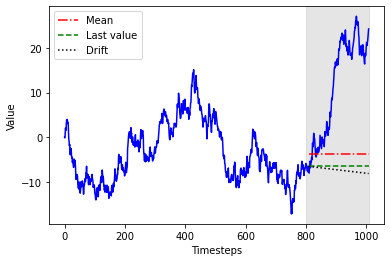

In [298]:
fig, ax = plt.subplots()

ax.plot(train.value, 'b-')
ax.plot(test['value'], 'b-')
ax.plot(test['pred_mean'], 'r-.', label='Mean')
ax.plot(test['pred_last'], 'g--', label='Last value')
ax.plot(test['pred_drift'], 'k:', label='Drift')

ax.axvspan(800, 1009, color='#808080', alpha=0.2)
ax.legend(loc=2)

ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')
# We can see that our forecasts are faulty. They all fail to predict the sudden increase observed in the test set, which makes sense, because the future change in
#a random walk is completely random, and therefore unpredictable.

In [299]:
from sklearn.metrics import mean_squared_error

mse_mean = mean_squared_error(test['value'], test['pred_mean'])
mse_last = mean_squared_error(test['value'], test['pred_last'])
mse_drift = mean_squared_error(test['value'], test['pred_drift'])

print(mse_mean, mse_last, mse_drift)

356.379830348255 450.5662649306134 490.31613847334745


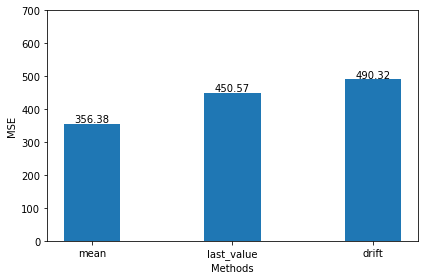

In [300]:
fig, ax = plt.subplots()

x = ['mean', 'last_value', 'drift']
y = [mse_mean, mse_last, mse_drift]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Methods')
ax.set_ylabel('MSE')
ax.set_ylim(0, 700)

for index, value in enumerate(y):
    plt.text(x=index, y=value+5, s=str(round(value, 2)), ha='center')

plt.tight_layout()

In [301]:
# Forecast the next timestep

In [302]:
nf_shift = nf.shift(periods=1) #nf_shift is now our forecast over the entire random walk, and it corresponds 
#to the last known value at each timestep

nf_shift.head()

,value
0,NaN
1,0.000000
2,-0.138264
3,0.509424
4,2.032454


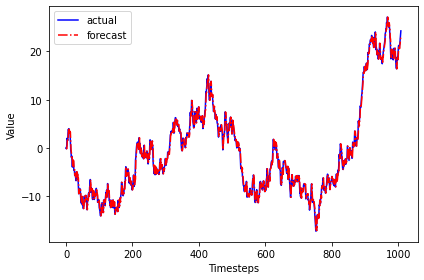

In [303]:
fig, ax = plt.subplots()

ax.plot(nf, 'b-', label='actual')
ax.plot(nf_shift, 'r-.', label='forecast')

ax.legend(loc=2)

ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()
#A naive forecast of the next timestep of a random walk. This plot gives the illusion of a very good model, when we are in fact only predicting the value 
#observed at the previous timestep.
#It seems that we do not have two separate lines in the graph, since both of them almost perfectly overlap, which is a sign of a perfect
#fit. Now, we can calculate the MSE

In [304]:
mse_one_step = mean_squared_error(test['value'], nf_shift[809:])

mse_one_step #Calculate the MSE on the test set.


0.939060114354059

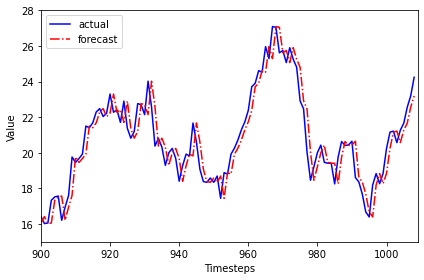

In [305]:
fig, ax = plt.subplots()

ax.plot(nf, 'b-', label='actual')
ax.plot(nf_shift, 'r-.', label='forecast')

ax.legend(loc=2)

ax.set_xlim(900, 1009)
ax.set_ylim(15, 28)

ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()

#Close-up on the last 100 timesteps of our random walk. Here we can see how our forecasts are a simple shift of the original time series

In [306]:
#Therefore, if a random walk process must be forecast, it is better to make manyshort-term forecasts. That way, we do not allow for many random numbers to accumulate over time, which will degrade the quality of our forecasts in the long term. 
#Because a random process takes random steps into the future, we cannot use statistical or deep learning techniques to fit such a process there is nothing to learn from randomness and it cannot be predicted. Instead, we must rely on naive forecasting methods.
#Ultimately, we cannot predict random movements